# Hometask №2 
## by Anton Kondrashov
##### HSE, CS, BSE 141(1)

## Task 1

In [1]:
import numpy as np
import pandas as pd
import scipy.spatial
import matplotlib.pyplot as plt

In [2]:
#1
def generate_points():
    result = []
    for d in range(1,200):
        result.append(np.random.uniform(-1, 1, (100, d)))
    return result

points = generate_points()

In [3]:
#2
from scipy.spatial.distance import cdist
def calculate_distances(point_index, dataset):
    distances = cdist(dataset, dataset, 'euclidean')[point_index] # get distances to neccessary point
    #remove the distance to the point itself
    distances = np.delete(distances, point_index)
    
    max_dist = np.amax(distances)
    min_dist = np.amin(distances)
    return (max_dist, min_dist)

calculate_distances(0, points[2])

(2.0427877712113531, 0.38675540667674507)

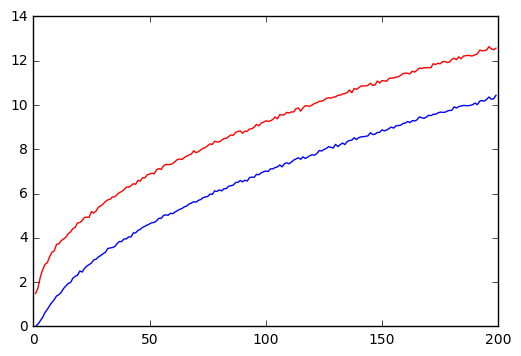

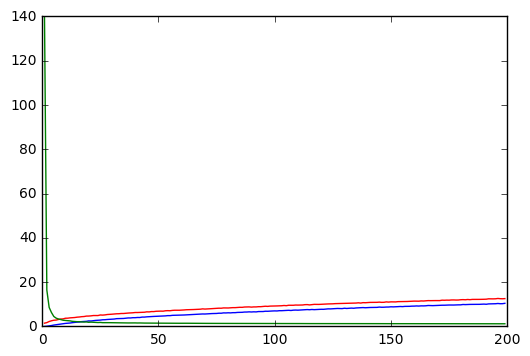

In [20]:
amaxes, amins, ratio = [], [], []

for dim_points in points:
    maxes, mins = [], []
    for i in range(0, len(dim_points)):
        max_d, min_d = calculate_distances(i, dim_points)
        maxes.append(max_d)
        mins.append(min_d)
    
    amax = np.average(maxes)
    amin = np.average(mins)
    
    amaxes.append(amax)
    amins.append(amin)
    ratio.append(amax/amin)

plt.plot(range(1,200), amaxes, 'r', range(1,200), amins, 'b')
plt.show()

plt.plot(range(1,200), amaxes, 'r', range(1,200), amins, 'b', range(1,200), ratio, 'g')
plt.show()

## Conclusion

Dimentionality curse takes place here because we can see: as dimensions increse ratio of average max distance to average min distance decreases which makes distance measure meaningless.

## Task 2

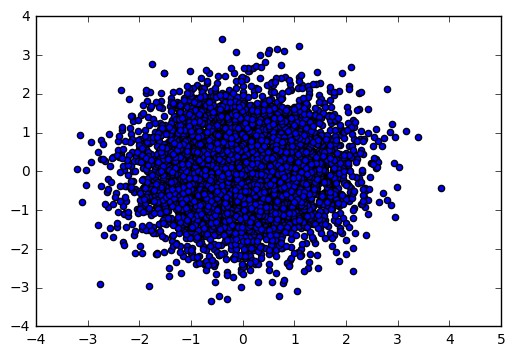

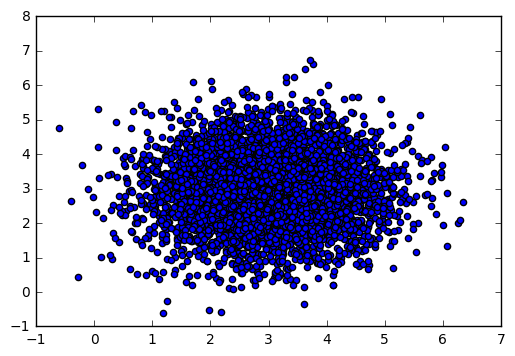

In [40]:
#1
m1 = [3,3]
m2 = [0,0]
cov = np.identity(2)
dataset1 = np.random.multivariate_normal(m1,cov, 5000)
dataset2 = np.random.multivariate_normal(m2,cov, 5000)

X1, Y1 = dataset1.T
X2, Y2 = dataset2.T

import matplotlib.pyplot
import pylab

matplotlib.pyplot.scatter(X2, Y2)
matplotlib.pyplot.show()

matplotlib.pyplot.scatter(X1, Y1)
matplotlib.pyplot.show()

In [45]:
y1 = np.zeros(len(X1))
y2 = np.ones(len(X2))
y = np.append(y1,y2)

X = np.append(dataset1, dataset2, axis=0)
X

array([[ 4.17576614,  3.45727591],
       [ 2.26751341,  2.55086211],
       [ 3.9317872 ,  2.11713698],
       ..., 
       [ 0.5833774 ,  1.21280639],
       [ 0.63019129,  2.30318022],
       [-0.39764109, -0.12653886]])

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
knc = KNeighborsClassifier()
knc.fit(X,y)

dtc = DecisionTreeClassifier()
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [63]:
#Inspired by http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
def draw_decision_surface(clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.show()


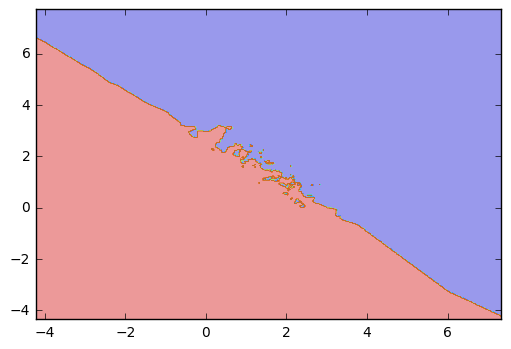

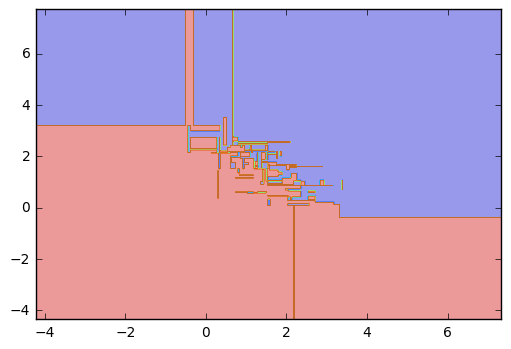

In [64]:
draw_decision_surface(knc)
draw_decision_surface(dtc)

1) Due to the definition of the decision tree, classifier based on it only may have decision boundary each piece of which is parallel to one of the axes. That's why the plot of DesicionTreeClassifier is similar to many rectangles cut out of surface.

2) On the opposite, kNN doesn't have such constraint and has more freedom in building desision boundary. Which explains the difference in smoothness of them. 

3) The colors are in such places because of relative positions of the fractions of points. In kNN this is based on the fact that all nearest neighbours in the left lower corner are ones and in right upper - zeros. It is similar to decision trees explanation, but in descision trees with Gini criterion the coloring is based on the fact that probabilty to encounter point labeled with zero in the left lower is zero.

## Task 3

In [7]:
#1
data = pd.read_csv('data.csv')
data

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
1,1,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
2,2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
3,3,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
4,4,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
5,5,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
6,6,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
7,7,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
8,8,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
9,9,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K


In [8]:
#2
x1 = data.drop(['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary'], axis=1)
x2 = pd.get_dummies(data.drop(['salary'], axis=1))
y = pd.get_dummies(data['salary'])
y = y[y.columns[0]]

In [9]:
#3
from sklearn.cross_validation import train_test_split as ttsp
X1_train, X1_test, y1_train, y1_test = ttsp(x1, y, test_size=0.3, random_state=1)
X2_train, X2_test, y2_train, y2_test = ttsp(x2, y, test_size=0.3, random_state=1)

In [10]:
#4
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(X1_train)

X1_train_std = scaler1.transform(X1_train)
X1_test_std = scaler1.transform(X1_test)

scaler2 = StandardScaler()
scaler2.fit(X2_train)

X2_train_std = scaler2.transform(X2_train)
X2_test_std = scaler2.transform(X2_test) 

In [11]:
#5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def test_classifier(cl, mes, xtr, ytr, xtest, ytest):
    cl.fit(xtr, ytr)
    cl.predict(xtest)
    print(mes)
    print(cl.score(xtest, ytest))
    

#1 dataset, no std,

test_classifier(DecisionTreeClassifier(),
                'Desicion Tree, no categorical features, no std',
                X1_train, y1_train, X1_test, y1_test)

test_classifier(DecisionTreeClassifier(),
                'Desicion Tree, with categorical features, no std', 
                X2_train, y2_train, X2_test, y2_test)

test_classifier(DecisionTreeClassifier(),
                'Desicion Tree, no categorical features, with std',
                X1_train_std, y1_train, X1_test_std, y1_test)

test_classifier(DecisionTreeClassifier(),
                'Desicion Tree, with categorical features, with std',
                X2_train_std, y2_train, X2_test_std, y2_test)


Desicion Tree, no categorical features, no std
0.772333333333
Desicion Tree, with categorical features, no std
0.815666666667
Desicion Tree, no categorical features, with std
0.767
Desicion Tree, with categorical features, with std
0.812


## Let's try to make results better

In [12]:
for i in range(1,100):
    test_classifier(KNeighborsClassifier(n_neighbors=i),
                str(i), 
                X1_train, y1_train, X1_test, y1_test)

1
0.688666666667
2
0.608
3
0.747333333333
4
0.708
5
0.774666666667
6
0.749666666667
7
0.790666666667
8
0.778333333333
9
0.793333333333
10
0.787
11
0.796333333333
12
0.791333333333
13
0.797333333333
14
0.794666666667
15
0.799333333333
16
0.796666666667
17
0.796666666667
18
0.796666666667
19
0.797
20
0.796666666667
21
0.796666666667
22
0.796666666667
23
0.796333333333
24
0.796666666667
25
0.795666666667
26
0.796666666667
27
0.794
28
0.795
29
0.793666666667
30
0.794
31
0.793666666667
32
0.793666666667
33
0.791666666667
34
0.791666666667
35
0.791
36
0.791666666667
37
0.790666666667
38
0.791333333333
39
0.79
40
0.789666666667
41
0.789666666667
42
0.79
43
0.789666666667
44
0.79
45
0.789333333333
46
0.789333333333
47
0.789333333333
48
0.789333333333
49
0.789
50
0.789
51
0.788333333333
52
0.788666666667
53
0.788333333333
54
0.788666666667
55
0.788
56
0.788
57
0.787666666667
58
0.787666666667
59
0.787333333333
60
0.787333333333
61
0.787
62
0.787
63
0.786666666667
64
0.787
65
0.786666666667
66
0

In [13]:
for i in range(1,100):
    test_classifier(KNeighborsClassifier(n_neighbors=i),
                str(i), 
                X2_train, y2_train, X2_test, y2_test)

1
0.688666666667
2
0.608
3
0.747333333333
4
0.708
5
0.774666666667
6
0.749666666667
7
0.790666666667
8
0.778333333333
9
0.793333333333
10
0.787
11
0.796333333333
12
0.791333333333
13
0.797333333333
14
0.794666666667
15
0.799333333333
16
0.796666666667
17
0.796666666667
18
0.796666666667
19
0.797
20
0.796666666667
21
0.796666666667
22
0.796666666667
23
0.796333333333
24
0.796666666667
25
0.795666666667
26
0.796666666667
27
0.794
28
0.795
29
0.793666666667
30
0.794
31
0.793666666667
32
0.793666666667
33
0.791666666667
34
0.791666666667
35
0.791
36
0.791666666667
37
0.790666666667
38
0.791333333333
39
0.79
40
0.789666666667
41
0.789666666667
42
0.79
43
0.789666666667
44
0.79
45
0.789333333333
46
0.789333333333
47
0.789333333333
48
0.789333333333
49
0.789
50
0.789
51
0.788333333333
52
0.788666666667
53
0.788333333333
54
0.788666666667
55
0.788
56
0.788
57
0.787666666667
58
0.787666666667
59
0.787333333333
60
0.787333333333
61
0.787
62
0.787
63
0.786666666667
64
0.787
65
0.786666666667
66
0

In [14]:
for i in range(1,100):
    test_classifier(KNeighborsClassifier(n_neighbors=i),
                str(i), 
                X1_train_std, y1_train, X1_test_std, y1_test)

1
0.752666666667
2
0.700666666667
3
0.793666666667
4
0.766666666667
5
0.807333333333
6
0.789333333333
7
0.809333333333
8
0.806
9
0.814
10
0.806333333333
11
0.817333333333
12
0.81
13
0.820666666667
14
0.814333333333
15
0.82
16
0.813333333333
17
0.818666666667
18
0.813666666667
19
0.821333333333
20
0.818
21
0.822666666667
22
0.817333333333
23
0.82
24
0.821666666667
25
0.821
26
0.819666666667
27
0.815333333333
28
0.817
29
0.816
30
0.818333333333
31
0.819666666667
32
0.819333333333
33
0.819666666667
34
0.819333333333
35
0.821666666667
36
0.821333333333
37
0.822333333333
38
0.823
39
0.824
40
0.824666666667
41
0.824333333333
42
0.825333333333
43
0.823333333333
44
0.824666666667
45
0.822
46
0.823666666667
47
0.822666666667
48
0.824
49
0.824
50
0.825666666667
51
0.825
52
0.827
53
0.825333333333
54
0.825333333333
55
0.824
56
0.825
57
0.823666666667
58
0.826666666667
59
0.824
60
0.828
61
0.823333333333
62
0.823666666667
63
0.822333333333
64
0.822
65
0.820666666667
66
0.821666666667
67
0.82033333

In [11]:
for i in range(1,100):
    test_classifier(KNeighborsClassifier(n_neighbors=i),
                str(i), 
                X2_train_std, y2_train, X2_test_std, y2_test)

2
0.750333333333
3
0.805666666667
4
0.793666666667
5
0.810666666667
6
0.808666666667
7
0.821333333333
8
0.816666666667
9
0.822
10
0.822333333333
11
0.823333333333
12
0.822666666667
13
0.819666666667
14
0.818
15
0.821333333333
16
0.82
17
0.825333333333
18
0.827333333333
19
0.828666666667
20
0.827
21
0.83
22
0.831666666667
23
0.833666666667
24
0.832666666667
25
0.835333333333
26
0.831666666667
27
0.836
28
0.831333333333
29
0.835666666667
30
0.833666666667
31
0.835666666667
32
0.833
33
0.835333333333
34
0.832333333333
35
0.832
36
0.832666666667
37
0.837
38
0.833666666667
39
0.837666666667
40
0.835333333333
41
0.834333333333
42
0.834
43
0.836333333333
44
0.836333333333
45
0.836666666667
46
0.836
47
0.836666666667
48
0.833666666667
49
0.833
50
0.833
51
0.832666666667
52
0.836
53
0.835333333333
54
0.835666666667
55
0.836666666667
56
0.838
57
0.837333333333
58
0.837
59
0.836
60
0.835666666667
61
0.837666666667
62
0.839
63
0.84
64
0.837666666667
65
0.840666666667
66
0.84
67
0.839666666667
68
0

In [83]:
test_classifier(KNeighborsClassifier(n_neighbors=15),
                'kNN, no categorical features, no std', 
                X1_train, y1_train, X1_test, y1_test)

test_classifier(KNeighborsClassifier(n_neighbors=15),
                'kNN, with categorical features, no std', 
                X2_train, y2_train, X2_test, y2_test)

test_classifier(KNeighborsClassifier(n_neighbors=52),
                'kNN, no categorical features, with std', 
                X1_train_std, y1_train, X1_test_std, y1_test)

test_classifier(KNeighborsClassifier(n_neighbors=91),
                'kNN, with categorical features, with std', 
                X2_train_std, y2_train, X2_test_std, y2_test)

kNN, no categorical features, no std
0.799333333333
kNN, with categorical features, no std
0.799333333333
kNN, no categorical features, with std
0.827
kNN, with categorical features, with std
0.844666666667


## We got the best we could from varying parameter on interval [1,100].
## Now let's try Decision Trees

In [87]:
test_classifier(DecisionTreeClassifier(),
                'DT, no categorical features, no std', 
                X1_train, y1_train, X1_test, y1_test)

test_classifier(DecisionTreeClassifier(),
                'DT, with categorical features, no std', 
                X2_train, y2_train, X2_test, y2_test)

test_classifier(DecisionTreeClassifier(),
                'DT, no categorical features, with std', 
                X1_train_std, y1_train, X1_test_std, y1_test)

test_classifier(DecisionTreeClassifier(),
                'DT, with categorical features, with std', 
                X2_train_std, y2_train, X2_test_std, y2_test)

DT, no categorical features, no std
0.767333333333
DT, with categorical features, no std
0.814666666667
DT, no categorical features, with std
0.768333333333
DT, with categorical features, with std
0.811


## Let's try to make it better

In [12]:
def get_score(cl, xtr, ytr, xtest, ytest):
    cl.fit(xtr, ytr)
    cl.predict(xtest)
    return cl.score(xtest, ytest)

def get_max(mes, xtr, ytr, xtest, ytest):
    max_score = 0.0
    params = (0,0)
    for i in range(1,50):
        for j in range(1,50):
            sc = get_score(DecisionTreeClassifier(max_depth=i, min_samples_leaf=j), 
                           xtr, ytr, xtest, ytest)
            if max_score < sc:
                params = (i,j)
                max_score = sc
    
    print(mes)
    print('Score:' + str(max_score))
    print('With params' + str(params))

In [13]:
get_max('DT, no categorical features, no std', X1_train, y1_train, X1_test, y1_test)
get_max('DT, with categorical features, no std', X2_train, y2_train, X2_test, y2_test)
get_max('DT, no categorical features, with std', X1_train_std, y1_train, X1_test_std, y1_test)
get_max('DT, with categorical features, with std', X2_train_std, y2_train, X2_test_std, y2_test)

DT, no categorical features, no std
Score:0.842666666667
With params(10, 34)
DT, with categorical features, no std
Score:0.86
With params(12, 39)
DT, no categorical features, with std
Score:0.842666666667
With params(10, 34)
DT, with categorical features, with std
Score:0.86
With params(12, 39)


#### #6
1) The Decision Trees classifier is the best for this problem because categorical features are easy to interpret and use for it.

2) Standartisation increases accurancy of kNN and doesn't change the accurancy of decision trees. That happens because the difference in scale of values of different features affects influence of an individual feature because it has much more different part in distance calculation than other features. At the same time standartisation doesn't affect decision trees because tree building depends on threshold which is relative to the whole feature data and therefore doesn't require regularisation.

3) Decision Trees (see p.1) Because the difference in feature scale changes individual feature affection. (see p.2)